## All-sky NOIRLab Source Catalog (DR2)

Joachim Moeyens - 2022-07-27

To install astro-datalab:  
```pip install --ignore-installed --no-cache-dir astro-datalab```

Login via the command line to datalab:  
```datalab login``` 


Information on the columns each of tables contains can be found here:  
[Exposure](https://datalab.noirlab.edu/query.php?name=nsc_dr2.exposure)  
[Measurements](https://datalab.noirlab.edu/query.php?name=nsc_dr2.meas)  
[Coverage](https://datalab.noirlab.edu/query.php?name=nsc_dr2.coverage)  
[Chip](https://datalab.noirlab.edu/query.php?name=nsc_dr2.chip)  
[Object](https://datalab.noirlab.edu/query.php?name=nsc_dr2.object)  



**References**:  
Nidever, D. L., Dey, A., Fasbender, K., Juneau, S., Meisner, A. M., Wishart, J., Scott, A., Matt, K., Nikutta, R., & Pucha, R. (2021). Second Data Release of the All-sky NOIRLab Source Catalog. The Astronomical Journal, 161(4), 192. https://doi.org/10.3847/1538-3881/ABD6E1

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import healpy as hp 
import matplotlib.pyplot as plt

%matplotlib inline 

from astropy.time import Time

In [2]:
! ls

README.md  nsc_dr2.ipynb  requirements.txt


In [3]:
DATA_DIR = "/epyc/projects/adam_datasets/nsc_dr2"

In [4]:
! ls {DATA_DIR}

In [5]:
from dl import authClient as ac
from dl import queryClient as qc
from getpass import getpass

username = 'moeyensj'
token = ac.login(username,getpass('Account Password: '))
if not ac.isValidToken(token):
    print('Error: invalid login for user %s (%s)' % (username,token))
else:
    print("Login token:   %s" % token)

Account Password:  ···················


Login token:   moeyensj.1469.1469.$1$.XR3BOZa$YI2R2vFq56wAc5eoI61TV1


Get the contents of the `exposure` table.

In [6]:
file_name = os.path.join(DATA_DIR, "nsc_dr2_exposure.csv")
if not os.path.exists(file_name):
    query = """SELECT * FROM nsc_dr2.exposure ORDER BY mjd ASC"""
    result = qc.query(token, sql=query, fmt='csv', out=file_name)
exposures = pd.read_csv(file_name, index_col=False)

In [7]:
! ls {DATA_DIR}

nsc_dr2_exposure.csv


In [8]:
exposures

,ra,dec,mjd,glon,glat,elon,elat,expnum,exptime,airmass,...,depth10sig,htm9,ring256,nest4096,nchips,zptype,instrument,exposure,dateobs,filter
0,325.458471,0.573520,56193.153260,56.266642,-36.712897,327.924076,13.574731,135571,30.0,1.25,...,20.442140,3179571,389533,78214476,61,1,c4d,c4d_120923_034041_ooi_z_a1,2012-09-23T03:40:41.660601,z
1,0.061316,-0.086972,56193.224556,96.380845,-60.292745,0.021668,-0.104185,135606,100.0,1.18,...,21.804886,2097152,393728,71303124,61,1,c4d,c4d_120923_052321_ooi_r_a1,2012-09-23T05:23:21.620923,r
2,0.061669,-0.086887,56193.227553,96.381565,-60.292807,0.022025,-0.104247,135608,100.0,1.19,...,21.098888,2097152,393728,71303124,61,1,c4d,c4d_120923_052740_ooi_z_a1,2012-09-23T05:27:40.579596,z
3,13.722164,0.584789,56193.248391,124.786381,-62.274532,12.855511,-4.875409,135628,30.0,1.17,...,20.483643,4070282,389671,73844989,61,1,c4d,c4d_120923_055741_ooi_z_a1,2012-09-23T05:57:41.023456,z
4,13.722153,0.584913,56193.249755,124.786351,-62.274409,12.855550,-4.875291,135630,30.0,1.17,...,21.379856,4070282,389671,73844989,61,1,c4d,c4d_120923_055938_ooi_r_a1,2012-09-23T05:59:38.844078,r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412111,297.299019,-42.346895,58803.025073,357.170249,-28.110903,291.275204,-20.902938,908080,40.0,1.42,...,21.620073,3125924,658743,194662523,61,1,c4d,c4d_191116_003606_ooi_g_v1,2019-11-16T00:36:06.342849,g
412112,303.587494,-42.361139,58803.025971,358.125860,-32.683407,296.144466,-21.922418,908081,30.0,1.32,...,21.427570,3118330,658761,194247882,61,1,c4d,c4d_191116_003723_ooi_g_v1,2019-11-16T00:37:23.909883,g
412113,294.232242,-56.404325,58803.043218,341.042224,-28.484806,285.956830,-34.299604,908104,30.0,1.61,...,21.482986,2991592,721139,193273976,61,1,c4d,c4d_191116_010214_ooi_g_v1,2019-11-16T01:02:14.076326,g
412114,312.749277,-76.311839,58803.057170,317.129405,-33.228831,286.395874,-55.315892,908121,55.0,1.62,...,21.634424,2962392,775292,185347871,61,1,c4d,c4d_191116_012219_ooi_r_v1,2019-11-16T01:22:19.476230,r


In [9]:
len(exposures)

412116

In [10]:
time_range = Time([exposures["mjd"].min(), exposures["mjd"].max()], scale="utc", format="mjd")

In [11]:
time_range.isot

array(['2012-09-23T03:40:41.661', '2019-11-16T01:25:22.744'], dtype='<U23')

In [12]:
exposures.columns

Index(['ra', 'dec', 'mjd', 'glon', 'glat', 'elon', 'elat', 'expnum', 'exptime',
       'airmass', 'nmeas', 'fwhm', 'rarms', 'rastderr', 'decrms', 'decstderr',
       'ebv', 'ngaiamatch', 'zpterm', 'zptermerr', 'zptermsig', 'nrefmatch',
       'depth95', 'depth10sig', 'htm9', 'ring256', 'nest4096', 'nchips',
       'zptype', 'instrument', 'exposure', 'dateobs', 'filter'],
      dtype='object')

Group by visits to Healpixels:

In [13]:
visits = exposures.groupby(by=["nest4096"])["mjd"].describe()

In [14]:
visits[visits["count"] > 10]

,count,mean,std,min,25%,50%,75%,max
nest4096,,,,,,,,
2190665,12.0,56248.669815,8.168645,56235.122763,56248.659080,56253.178303,56253.189043,56253.199699
6368058,11.0,57795.128260,0.013177,57795.105694,57795.121337,57795.132813,57795.137355,57795.142095
7853663,43.0,57778.941138,20.931115,57758.188206,57758.228235,57780.121181,57799.097170,57825.120359
17605432,15.0,57512.136715,0.002960,57512.128843,57512.135284,57512.137060,57512.138738,57512.140544
17618665,11.0,58185.743467,35.521694,58141.213145,58143.314887,58214.990770,58214.993913,58215.002760
...,...,...,...,...,...,...,...,...
201090094,21.0,57190.320164,0.061606,57190.224167,57190.268794,57190.313458,57190.372925,57190.425047
201090182,29.0,57190.327633,0.064650,57190.222689,57190.274769,57190.326824,57190.378882,57190.439153
201090192,30.0,57190.329081,0.065524,57190.221208,57190.275137,57190.329050,57190.382971,57190.437488


In [15]:
visits["range"] = visits["max"] - visits["min"]
visits.head()

,count,mean,std,min,25%,50%,75%,max,range
nest4096,,,,,,,,,
3040,2.0,56627.215570,0.000972,56627.214883,56627.215226,56627.215570,56627.215914,56627.216257,0.001375
3042,3.0,56619.234527,0.001379,56619.233149,56619.233838,56619.234527,56619.235216,56619.235906,0.002757
8695,1.0,57743.132475,NaN,57743.132475,57743.132475,57743.132475,57743.132475,57743.132475,0.000000
8701,3.0,57711.174457,0.001370,57711.173088,57711.173772,57711.174456,57711.175142,57711.175827,0.002740
9064,5.0,58057.849226,55.297926,58020.389354,58021.325475,58022.323735,58079.167031,58146.040534,125.651181


In [16]:
visits[(visits["range"] >= 10) & (visits["count"] >= 10)] 

,count,mean,std,min,25%,50%,75%,max,range
nest4096,,,,,,,,,
2190665,12.0,56248.669815,8.168645,56235.122763,56248.659080,56253.178303,56253.189043,56253.199699,18.076936
7853663,43.0,57778.941138,20.931115,57758.188206,57758.228235,57780.121181,57799.097170,57825.120359,66.932153
17618665,11.0,58185.743467,35.521694,58141.213145,58143.314887,58214.990770,58214.993913,58215.002760,73.789615
17618668,12.0,58139.652729,159.332651,57780.253944,58144.976310,58221.990930,58221.997147,58222.000628,441.746684
17653044,12.0,58141.332664,119.377354,57779.251679,58142.302551,58144.761140,58215.014993,58222.017890,442.766211
...,...,...,...,...,...,...,...,...,...
197667855,17.0,56532.366122,163.046788,56458.279232,56459.296806,56459.401492,56459.428898,56874.070506,415.791274
199769967,68.0,57381.011943,218.935833,57236.079930,57292.076765,57293.128660,57294.983641,57848.411336,612.331406
199769978,42.0,57265.360074,16.104632,57237.137307,57264.153738,57264.204310,57264.227518,57295.138589,58.001283


In [17]:
visits[((visits["count"] / visits["range"]) >= 1) & (visits["count"] >= 10) & (visits["range"] >= 10)]

,count,mean,std,min,25%,50%,75%,max,range
nest4096,,,,,,,,,
34153899,21.0,56867.839513,5.649200,56858.955239,56863.953129,56863.981477,56873.960346,56874.010184,15.054944
50814505,14.0,57971.134993,2.652955,57970.121719,57970.197935,57970.243134,57970.970304,57980.234680,10.112960
67546232,11.0,56235.905633,4.276989,56232.015646,56232.016652,56235.060130,56238.639535,56242.218950,10.203303
70332718,15.0,56868.189076,6.475508,56859.384649,56863.423515,56872.395769,56874.354047,56874.369040,14.984392
72466616,3099.0,57351.038056,585.400032,56238.185133,56931.232817,57339.184025,57763.048144,58694.408142,2456.223009
...,...,...,...,...,...,...,...,...,...
187297459,14.0,57601.817124,3.678866,57595.300965,57599.248545,57602.738898,57604.243918,57607.224049,11.923084
187384846,211.0,57604.139640,3.862723,57597.250152,57602.243490,57606.251436,57606.293654,57607.291779,10.041627
187384868,589.0,57603.836934,1.915467,57595.311564,57603.252491,57604.280738,57605.258208,57607.288353,11.976789


In [18]:
exposures[exposures["nest4096"] == 34153899]["dateobs"]

84913    2014-07-20T22:55:32.663687
84928    2014-07-20T23:40:27.378918
85157    2014-07-25T00:31:53.658877
85158    2014-07-25T00:32:29.642527
85159    2014-07-25T00:33:42.901910
85305    2014-07-25T22:52:30.372792
85306    2014-07-25T22:53:09.118937
85307    2014-07-25T22:54:23.967951
85320    2014-07-25T23:31:25.275890
85321    2014-07-25T23:32:02.335160
85322    2014-07-25T23:33:19.642741
85736    2014-08-01T23:53:33.429868
85737    2014-08-01T23:54:41.426105
86302    2014-08-04T22:55:24.478593
86303    2014-08-04T23:00:03.733014
86304    2014-08-04T23:02:53.926175
86305    2014-08-04T23:03:31.207938
86306    2014-08-04T23:04:39.626179
86329    2014-08-05T00:12:55.837541
86330    2014-08-05T00:13:31.949705
86331    2014-08-05T00:14:39.867043
Name: dateobs, dtype: object

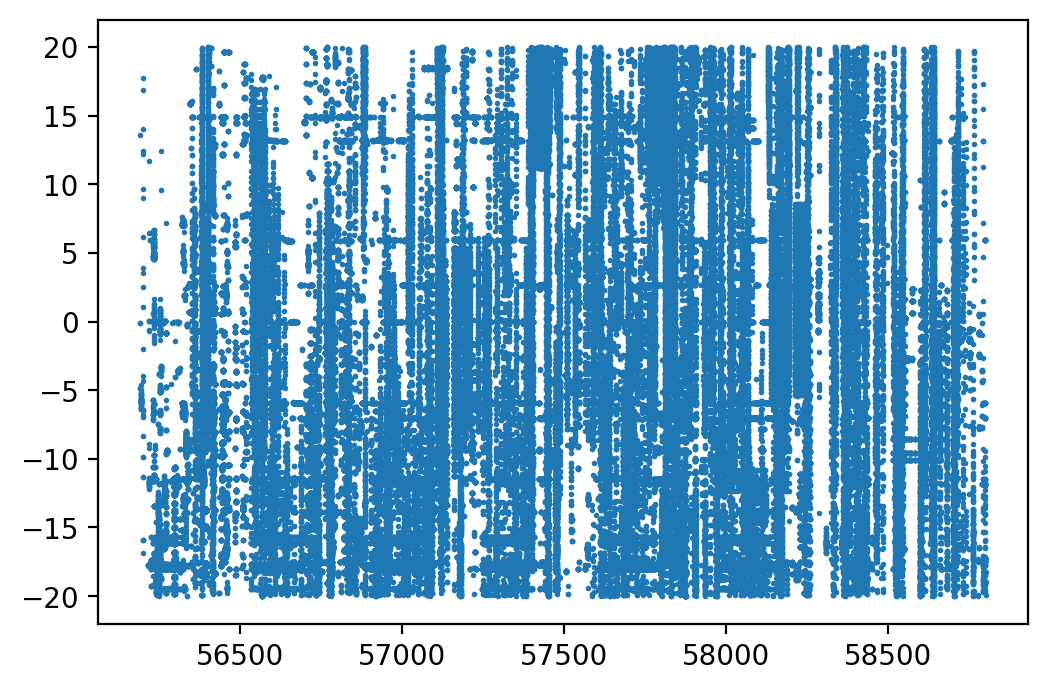

In [19]:
fig, ax = plt.subplots(1, 1, dpi=200)
ax.scatter(exposures[(exposures["elat"] <= 20) & (exposures["elat"] >= -20)]["mjd"].values, exposures[(exposures["elat"] <= 20) & (exposures["elat"] >= -20)]["elat"].values, s=1)

(array([14.,  0.,  0., 12.,  9., 11., 30., 23.,  0.,  0.,  0.,  0., 10.,
         5.,  0.,  0., 65.,  0.,  0., 20., 25., 52., 47., 40.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  6., 44., 13., 11., 27., 15., 48., 55.,
         6.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 15., 50., 53.,  0., 34.,
         5., 15.,  1., 39.,  0.,  0.,  0.,  0.,  8.,  0., 11.,  0., 72.,
        29.,  0., 41., 30., 41., 67., 46.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0., 32.,  0., 26.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  5.,  1.,  0.,  0.,  0.,  0.,  0., 12.]),
 array([56515.42740495, 56538.29327023, 56561.15913552, 56584.02500081,
        56606.89086609, 56629.75673138, 56652.62259666, 56675.48846195,
        56698.35432724, 56721.22019252, 56744.08605781, 56766.95192309,
        56789.81778838, 56812.68365367, 56835.54951895, 56858.41538424,
        56881.28124952, 56904.14711481, 56927.0129801 , 56949.87884538,
        56972.74471067, 56995.61057595, 57018.47644124, 57041.34230653,
  

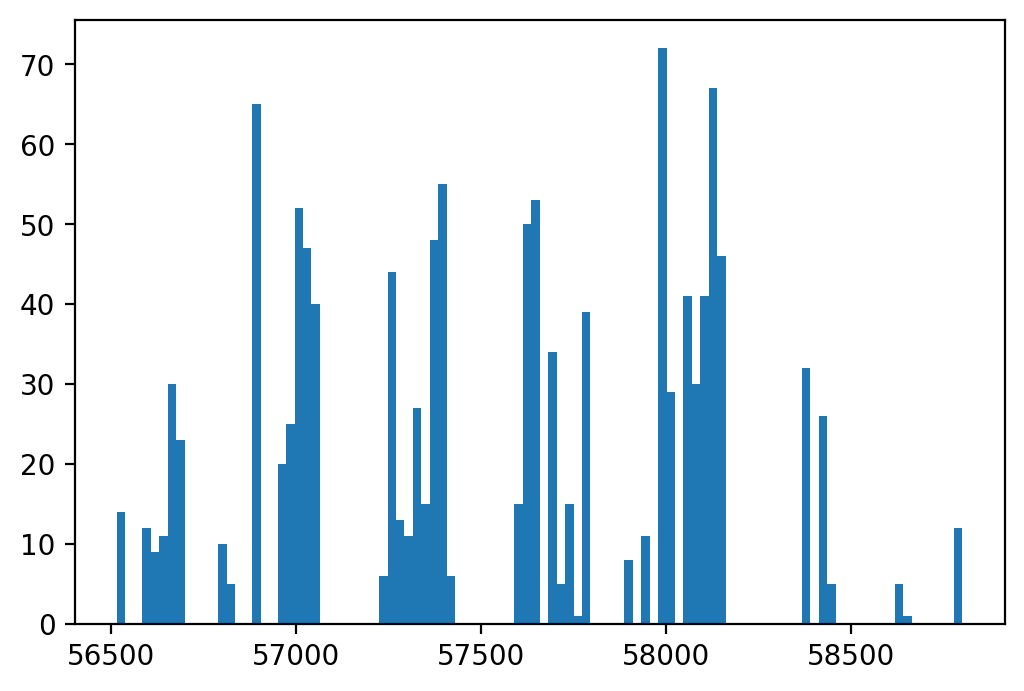

In [21]:
fig, ax = plt.subplots(1, 1, dpi=200)
ax.hist(exposures[exposures["nest4096"] == 73819750]["mjd"].values, bins = 100)

In [22]:
Time([57000],scale="utc", format="mjd").isot

array(['2014-12-09T00:00:00.000'], dtype='<U23')

The NSC DR2 release contains data from three instruments:

In [23]:
exposures["instrument"].value_counts()

c4d    340952
k4m     41561
ksb     29603
Name: instrument, dtype: int64

CTIO-4m+DECam : c4d  
KPNO-4m+Mosaic3 : ksb  
Bok-2.3+90Prime : k4m  

Number of measurements per instrument:

In [24]:
exposures.groupby(by="instrument")["nmeas"].sum()

instrument
c4d    67150049862
k4m      372455582
ksb      309102671
Name: nmeas, dtype: int64

In [25]:
exposures[["exposure", "instrument", "nmeas", "filter"]]

,exposure,instrument,nmeas,filter
0,c4d_120923_034041_ooi_z_a1,c4d,53695,z
1,c4d_120923_052321_ooi_r_a1,c4d,43608,r
2,c4d_120923_052740_ooi_z_a1,c4d,44838,z
3,c4d_120923_055741_ooi_z_a1,c4d,30981,z
4,c4d_120923_055938_ooi_r_a1,c4d,32009,r
...,...,...,...,...
412111,c4d_191116_003606_ooi_g_v1,c4d,69007,g
412112,c4d_191116_003723_ooi_g_v1,c4d,48774,g
412113,c4d_191116_010214_ooi_g_v1,c4d,56208,g
412114,c4d_191116_012219_ooi_r_v1,c4d,61853,r


In [26]:
def date_range(mjds):
    drange = mjds.max() - mjds.min()
    return drange  / 365.25

In [27]:
exposures.groupby(by="instrument")["mjd"].apply(lambda x : (x.max() - x.min()) / 365.25)

instrument
c4d    7.145533
k4m    1.532746
ksb    3.296991
Name: mjd, dtype: float64

In [28]:
exposures.groupby(by="instrument")["mjd"].apply(date_range)

instrument
c4d    7.145533
k4m    1.532746
ksb    3.296991
Name: mjd, dtype: float64

In [29]:
exposures.groupby(by="instrument")["mjd"].describe()

,count,mean,std,min,25%,50%,75%,max
instrument,,,,,,,,
c4d,340952.0,57458.355339,694.855840,56193.153260,56863.248899,57446.051552,58039.994145,58803.059291
k4m,41561.0,57672.455034,185.177050,57412.325486,57481.423137,57771.320544,57846.190081,57972.160799
ksb,29603.0,57856.505203,327.367537,57338.069661,57521.303955,57841.151430,58171.444994,58542.295731


Text(0.5, 0, 'Observation Time [MJD]')

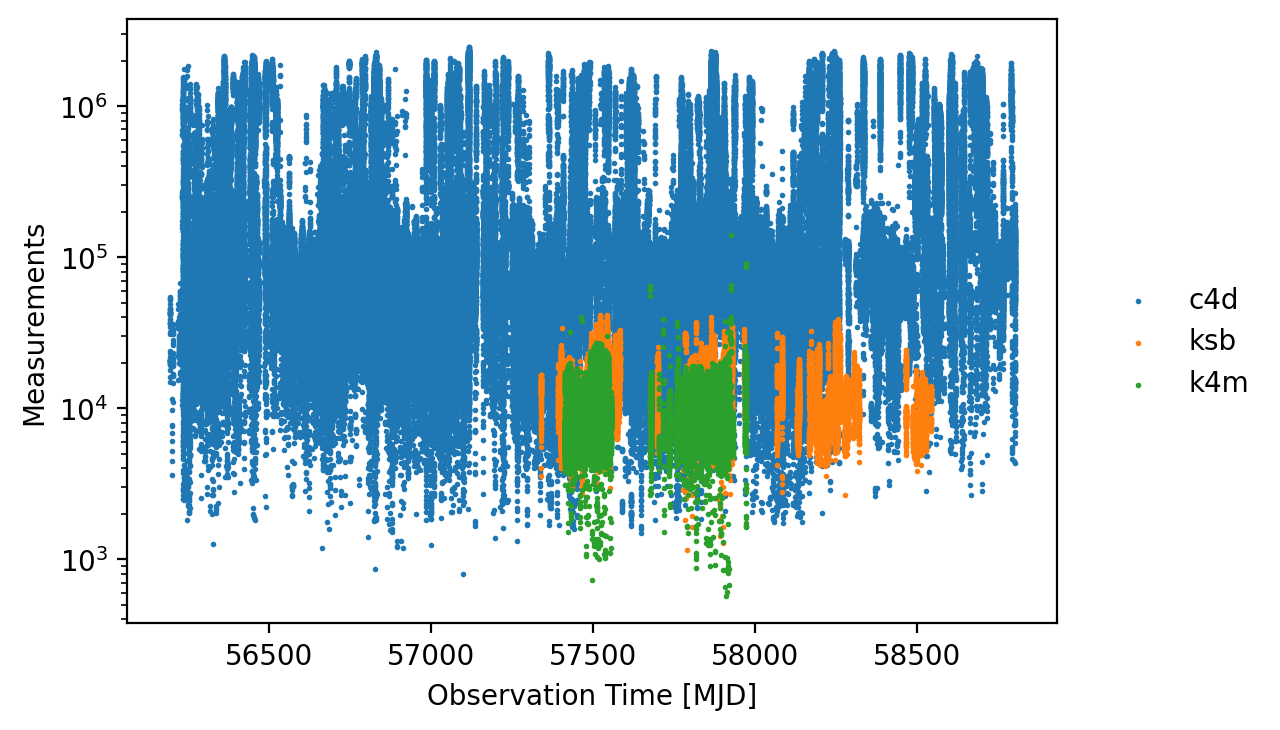

In [30]:
fig, ax = plt.subplots(1, 1, dpi=200)
for instrument in exposures["instrument"].unique():
    mask = exposures["instrument"].isin([instrument])

    ax.scatter(
        exposures[mask]["mjd"].values, 
        exposures[mask]["nmeas"].values, 
        label=instrument,
        s=1
    )
ax.set_yscale("log")
ax.legend(
    frameon=False,
    bbox_to_anchor=(1.03, 0.6)
)
ax.set_ylabel("Measurements")
ax.set_xlabel("Observation Time [MJD]")

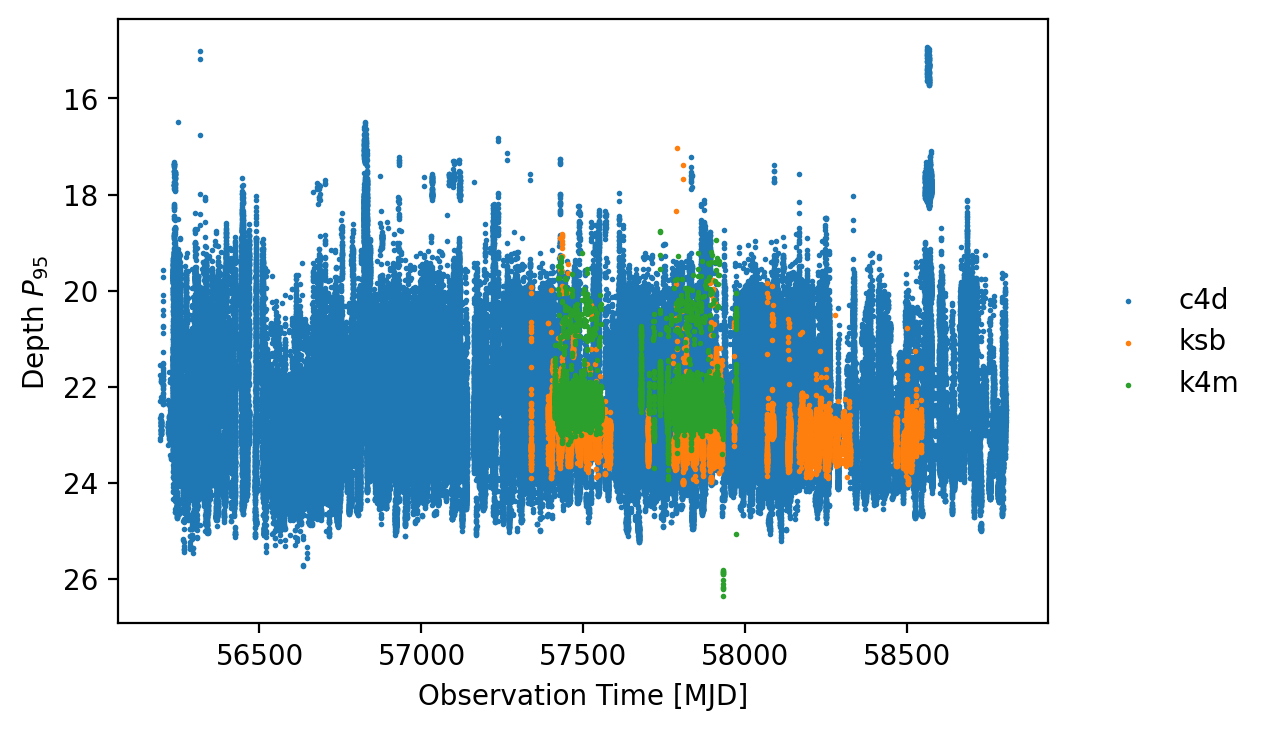

In [31]:
fig, ax = plt.subplots(1, 1, dpi=200)
for instrument in exposures["instrument"].unique():
    mask = exposures["instrument"].isin([instrument])

    ax.scatter(
        exposures[mask]["mjd"].values, 
        exposures[mask]["depth95"].values, 
        label=instrument,
        s=1
    )
ax.legend(
    frameon=False,
    bbox_to_anchor=(1.03, 0.6)
)
ax.set_ylabel(r"Depth $P_{95}$")
ax.set_xlabel("Observation Time [MJD]")
ax.invert_yaxis()

In [32]:
start_mjd = 56515
window_size = 20
window = exposures[
    (exposures["instrument"] == "c4d") 
    & (exposures["mjd"] <= start_mjd + window_size)
    & (exposures["mjd"] >= start_mjd)
]

In [33]:
window

,ra,dec,mjd,glon,glat,elon,elat,expnum,exptime,airmass,...,depth10sig,htm9,ring256,nest4096,nchips,zptype,instrument,exposure,dateobs,filter
32098,226.263344,-3.226380,56515.000669,354.886548,45.735935,224.749537,13.609984,225274,267.0,1.212638,...,22.717216,2835271,415875,184500946,61,1,c4d,c4d_130811_000057_ooi_r_a1,2013-08-11T00:00:57.793469,r
32099,226.280023,-3.210184,56515.004092,354.919830,45.735773,224.761257,13.630230,225275,267.0,1.223614,...,22.586380,2835271,415875,184500950,61,1,c4d,c4d_130811_000553_ooi_r_a1,2013-08-11T00:05:53.541334,r
32100,226.297343,-3.193120,56515.007518,354.954637,45.735770,224.773358,13.651488,225276,267.0,1.235345,...,22.530458,2835271,415875,184500951,61,1,c4d,c4d_130811_001049_ooi_r_a1,2013-08-11T00:10:49.515967,r
32101,232.684389,2.608003,56515.011104,7.127816,44.712991,229.571161,20.963652,225277,30.0,1.267917,...,21.089990,3442319,375958,128670953,61,1,c4d,c4d_130811_001559_ooi_r_a1,2013-08-11T00:15:59.344172,r
32102,232.683893,2.607293,56515.011786,7.126599,44.712965,229.570845,20.962839,225278,267.0,1.269973,...,22.467768,3442319,375958,128670953,61,1,c4d,c4d_130811_001658_ooi_g_a1,2013-08-11T00:16:58.314505,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33731,11.217568,-75.073280,56534.412804,303.501390,-42.047710,306.748019,-65.019938,228839,30.0,1.550000,...,20.613482,2174793,772830,136343076,61,1,c4d,tu2160803,2013-08-30T09:54:26.233040,z
33732,11.579024,-75.072815,56534.413846,303.376084,-42.051020,306.833035,-65.105869,228840,30.0,1.550000,...,20.563951,2174795,773158,136342719,61,1,c4d,tu2161069,2013-08-30T09:55:56.287951,z
33733,11.955251,-75.072533,56534.414541,303.245609,-42.053516,306.920339,-65.195570,228841,30.0,1.550000,...,20.554237,2174794,773158,136342745,61,1,c4d,tu2161068,2013-08-30T09:56:56.333413,z
33734,12.204039,-75.073676,56534.415253,303.159289,-42.053419,306.974701,-65.255480,228842,90.0,1.550000,...,21.168001,2174794,772831,136342824,61,1,c4d,tu2161130,2013-08-30T09:57:57.849528,z


In [37]:
file_name = os.path.join(DATA_DIR, "nsc_dr2_object_measurements.csv")
if not os.path.exists(file_name):

    ndets = np.arange(1, 7)
    result_dfs = []

    for ndet in ndets:
        query = f"""
        SELECT COUNT(*), SUM(ndet)
        FROM nsc_dr2.object 
        WHERE (ndet <= {ndet})
        """
        results = qc.query(token, adql=query, fmt='pandas', timeout=3600, async_=True, wait=True, poll=30, verbose=1)
        results.insert(0, "ndet", ndet)
        result_dfs.append(results)

    results = pd.concat(result_dfs, ignore_index=True)
    results.rename(
        columns={
            "ndet": "ndet<=",
            "COUNT": "num_objects",
            "SUM": "num_measurements",
        },
        inplace=True
    )
    results.to_csv(file_name, index=False)
    
else:
    results = pd.read_csv(file_name, index_col=False)

EXECUTING
Status = EXECUTING; elapsed time: 30, timeout in 3570
EXECUTING
Status = COMPLETED; elapsed time: 60, timeout in 3540
Retrieving results
EXECUTING
Status = EXECUTING; elapsed time: 30, timeout in 3570
EXECUTING
Status = EXECUTING; elapsed time: 60, timeout in 3540
EXECUTING
Status = COMPLETED; elapsed time: 90, timeout in 3510
Retrieving results
EXECUTING
Status = EXECUTING; elapsed time: 30, timeout in 3570
EXECUTING
Status = EXECUTING; elapsed time: 60, timeout in 3540
EXECUTING
Status = EXECUTING; elapsed time: 90, timeout in 3510
EXECUTING
Status = COMPLETED; elapsed time: 120, timeout in 3480
Retrieving results
EXECUTING
Status = EXECUTING; elapsed time: 30, timeout in 3570
EXECUTING
Status = EXECUTING; elapsed time: 60, timeout in 3540
EXECUTING
Status = EXECUTING; elapsed time: 90, timeout in 3510
EXECUTING
Status = COMPLETED; elapsed time: 120, timeout in 3480
Retrieving results
EXECUTING
Status = EXECUTING; elapsed time: 30, timeout in 3570
EXECUTING
Status = EXECUTI

In [38]:
results

,ndet<=,num_objects,num_measurements
0,1,886983556,886983556
1,2,1256647286,1626311016
2,3,1526429431,2435657451
3,4,1763381575,3383466027
4,5,1935252025,4242818277
5,6,2091917692,5182812279


In [ ]:
NDET = 4

ras = np.linspace(0, 360, 360 * 20 + 1)

In [ ]:
def queryRASlice(ra_start, ra_end, check_download_integrity=True):
    
    file_name = os.path.join(DATA_DIR, f"nsc_dr2_observations_{ra_start:06.2f}_{ra_end:06.2f}.csv")
    
    if not os.path.exists(file_name):
        query = f"""
        SELECT o.id, o.ra AS mean_ra, o.dec AS mean_dec, o.ndet, o.nphot, o.mjd AS mean_mjd, o.deltamjd, m.measid, m.mjd AS mjd_start, e.exptime, m.ra, m.dec, m.raerr, m.decerr, m.mag_auto, m.magerr_auto, m.filter, m.exposure, m.class_star 
        FROM nsc_dr2.object AS o 
        JOIN nsc_dr2.meas as m 
        ON o.id = m.objectId 
        JOIN nsc_dr2.exposure as e
        ON e.exposure = m.exposure
        WHERE (o.ndet <= {NDET}) AND (o.ra >= {ra_start}) AND (o.ra < {ra_end})
        """
        results = qc.query(token, adql=query, fmt='pandas', timeout=3600, async_=True, wait=True, poll=5, verbose=0)
        results.sort_values(by=["mjd_start", "measid"], inplace=True, ascending=[True, True])
        results.to_csv(file_name, index=False)
        
    
    if check_download_integrity:
        
        downloaded_results = pd.read_csv(file_name, index_col=False)
        
        query = f"""
        SELECT COUNT(*) 
        FROM nsc_dr2.object AS o 
        JOIN nsc_dr2.meas as m 
        ON o.id = m.objectId 
        WHERE (o.ndet <= {NDET}) AND (o.ra >= {ra_start}) AND (o.ra < {ra_end})
        """
        results = qc.query(token, adql=query, fmt='pandas', timeout=3600, async_=True, wait=True, poll=5, verbose=0)
        
        n_results = results["COUNT"].values[0]
        n_downloaded_results = len(downloaded_results)
        if n_results != n_downloaded_results:
            err = (f"Downloaded file ({file_name}) contains {n_results} rows while query expected {n_downloaded_results} rows.")
            raise ValueError(err)

        
    return

In [ ]:
import multiprocessing as mp

os.nice(10)

pool = mp.Pool(10)
pool.starmap(
    queryRASlice,
    zip(ras[:-1][:10], ras[1:][:10])
)
pool.close()

In [ ]:
! ls {DATA_DIR}

In [ ]:
exposures["mjd"].min(), exposures["mjd"].max()
 

In [ ]:
window_size = 31
window_starts = np.arange(
    np.floor(exposures["mjd"].min()), 
    np.ceil(exposures["mjd"].max()), 
    window_size
)
observation_files = sorted(glob.glob(os.path.join(DATA_DIR, "nsc_dr2_observations*.csv")))

In [ ]:
observation_files

In [ ]:
def processWindow(window_file_name, observations):
    if len(observations) > 0:
        observations.to_hdf(
            window_file_name, 
            key="data", 
            mode="a", 
            append=True, 
            min_itemsize={'id': 40, 'measid': 40, 'exposure': 40, 'filter' : 2},
        )
    return

In [ ]:
import multiprocessing as mp

os.nice(10)

pool = mp.Pool(10)

objids = []
obsids = []
observation_files_completed = np.array([])
for i, observation_file in enumerate(observation_files):
    observations = pd.read_csv(observation_file, index_col=False)
    objids.append(observations["id"].unique())
    obsids.append(observations["measid"].unique())
    
    windows = []
    window_file_names = []
    for window_start in window_starts:
        
        window_end = window_start + window_size
        start_isot = Time(window_start, scale="utc", format="mjd").isot.split("T")[0]
        end_isot = Time(window_end, scale="utc", format="mjd").isot.split("T")[0]
        
        window_file_name = os.path.join(DATA_DIR, "hdf5", f"nsc_dr2_observations_{start_isot}_{end_isot}.h5")
        window_file_names.append(window_file_name)
        
        observations_window = observations[(observations["mjd_start"] >= window_start) & (observations["mjd_start"] < window_end)]
        windows.append(observations_window)
        
    pool.starmap(
        processWindow,
        zip(window_file_names, windows)
    )
    
    observation_files_completed = np.concatenate([observation_files_completed, np.array([observation_file])])
    np.savetxt("files_processed.txt", observation_files_completed, delimiter="\n", fmt="%s")
        
    if (i + 1) % 20 == 0:
        print(f"Processed {i + 1} observations files.")
        
objids = np.concatenate(objids)
obsids = np.concatenate(obsids)
pool.close()

In [ ]:
observations_h5 = sorted(glob.glob(os.path.join(DATA_DIR, "hdf5", "*.h5")))

In [ ]:
observations_h5

In [ ]:
pd.read_hdf(observations_h5[0], key="data")

In [ ]:
! mkdir {DATA_DIR}/preprocessed

In [ ]:
! ls -ld {DATA_DIR}/*

In [ ]:
for i, file_in in enumerate(observations_h5):
    file_out = os.path.join(DATA_DIR, "preprocessed", os.path.basename(file_in))

    df = pd.read_hdf(file_in, key="data")
    
    # Exposure times in the NSC measurements table report the start of the exposure
    # 
    df["mjd_mid"] = df["mjd_start"] + df["exptime"] / 2 / 86400 
    df = df[["measid", "exposure", "mjd_start", "mjd_mid", "ra", "dec", "raerr", "decerr", "filter", "mag_auto", "magerr_auto"]]
    df.rename(
        columns={
            "measid" : "obs_id",
            "exposure" : "exposure_id",
            "mjd_mid" : "mjd_utc",
            "ra" : "ra",
            "dec" : "dec",
            "raerr" : "ra_sigma",
            "decerr" : "dec_sigma",
            "mag_auto" : "mag",
            "magerr_auto" : "mag_sigma",
            "filter" : "filter"
        },
        inplace=True
    )
    df.loc[:, "ra_sigma"] /= 3600.0
    df.loc[:, "dec_sigma"] /= 3600.0
    df.loc[df["obs_id"].str[:3].isin(["c4d"]), "observatory_code"] = "W84"
    df.loc[df["obs_id"].str[:3].isin(["ksb"]), "observatory_code"] = "V00"
    df.loc[df["obs_id"].str[:3].isin(["k4m"]), "observatory_code"] = "695"
    df.sort_values(
        by=["mjd_utc", "observatory_code"],
        inplace=True,
        ignore_index=True
    )
    df.to_hdf(
        file_out,
        key='data', 
        index=False,
        mode='w',
        format='table', 
    )
    
    if (i + 1) % 20 == 0:
        print(f"Processed {i + 1} observations files.")

In [ ]:
! ls {DATA_DIR}/preprocessed